In [8]:
import math
import operator

In [3]:
#计算香农熵
#整体数据集的香农熵
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    
    for featVec in dataSet:
        currentLabel = featVec[-1] #fetch row feature
        
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
            
        labelCounts[currentLabel] += 1
    
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob*math.log(prob , 2)
        
    return shannonEnt

In [6]:
def splitDataSet(dataSet , axis , value):
    retDataSet = []
    
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    
    return retDataSet

In [17]:
def chooseBestFeatureToSplit(dataSet): #利用信息增益进行划分
    numFeatures = len(dataSet[0]) - 1#获取feature数量
    baseEntropy = calcShannonEnt(dataSet) #计算原始数据集的香农熵
    
    #最好的划分feature
    bestInfoGain= 0.0
    bestFeature = -1
    
    for i in range(numFeatures): #计算所有feature的信息增益 从而选取信息增益最大的feature作为划分的feature
        featList = [example[i] for example in dataSet] #获取feature的所有取值情况 这种取法可能有重复值
        uniqueVals = set(featList)#删除重复值 利用 集合set 和 列表list 的不同来快速去除重复值
        newEntropy = 0.0
        
        for value in uniqueVals:
            #特征i的可能取值value
            subDataSet = splitDataSet(dataSet , i , value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += calcShannonEnt(subDataSet)
        
        #计算信息增益
        infoGain = baseEntropy - newEntropy
        
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
    
    return bestFeature

In [10]:
#当一个节点中只剩下一个feature时 但是类标签不是唯一的时候 通常使用出现次数的类标签作为这个节点的类标签
def majorityCnt(classList):
    classCount = {}
    
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        
        classCount[vote] += 1
    
    sortedClassCount = sorted(classCount.iteritems() , key=operator.itemgetter(1) , reverse=True)
    
    return sortedClassCount[0][0]

In [88]:
def createTree(dataSet , labels):
    classList = [example[-1] for example in dataSet]
    
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    
    myTree = {bestFeatLabel:{}}
    
    del(labels[bestFeat]) #删除已经使用过的feature
    
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    
    for value in uniqueVals:
        subLabels = labels.copy()
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet , bestFeat , value) , subLabels)
    
    return myTree



In [48]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    #change to discrete values
    return dataSet, labels

In [49]:
#test
myDat , labels = createDataSet()
myTree = createTree(myDat , labels)

In [39]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [42]:
#如何使用决策树进行分类
def classify(inputTree , featLabels , testVec):
    _ = list(inputTree.keys())
    firstStr = _[0]
    #firstStr = inputTree.keys()[0]#python 3中无效了 不能索引key
    secondDict = inputTree[firstStr]
    print(featLabels)
    featIndex = featLabels.index(firstStr)
    
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key] , featLabels , testVec)
            else:
                classLabel = secondDict[key]
    
    return classLabel

In [50]:
classify(myTree ,  ['no surfacing','flippers'] , [1,0]) #[1,0]为测试数据

['no surfacing', 'flippers']
['no surfacing', 'flippers']


'no'

In [83]:
#======
#序列化将决策树存储起来
import pickle

def storeTree(inputTree , filename):
    fw = open(filename , 'wb')
    pickle.dump(inputTree , fw)
    fw.close()

def grabTree(filename):
    fr = open(filename , 'rb')
    return pickle.load(fr)

In [81]:
storeTree(myTree , 'store_decision_tree_test.txt')

In [84]:
grabTree('store_decision_tree_test.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [89]:
#==============
#实际使用 隐形眼镜数据集
fr = open('../MLiA_SourceCode/Ch03/lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age','prescript' , 'astigmatic' , 'tearRate']
lensesTree = createTree(lenses , lensesLabels)

In [90]:
lensesTree

{'tearRate': {'hard': 'hard', 'no lenses': 'no lenses', 'soft': 'soft'}}

In [91]:
lensesLabels

['age', 'prescript', 'astigmatic']

In [ ]:
#===========
#===========
#===========
#

In [20]:
#绘制图像测试
import matplotlib.pyplot as plt


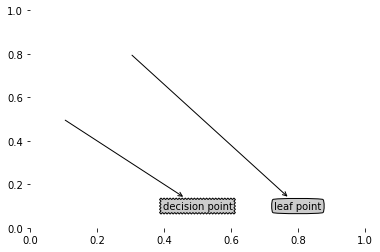

In [28]:
decisionNode = dict(boxstyle='sawtooth' , fc = '0.8')
leafNode = dict(boxstyle='round4' , fc='0.8')
arrow_args = dict(arrowstyle = '<-')

def plotNode(nodeTxt , centerPt , parentPt , nodeType):
    createPlot.ax1.annotate(nodeTxt , xy=parentPt , xycoords = 'axes fraction' , xytext = centerPt , textcoords = 'axes fraction',
                           va = 'center' , ha = 'center' , bbox = nodeType , arrowprops = arrow_args)

def createPlot():
    fig = plt.figure(1 , facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111 , frameon=False)
    plotNode('decision point' , (0.5,0.1) , (0.1 , 0.5) , decisionNode)
    plotNode('leaf point' , (0.8,0.1) , (0.3 , 0.8) , leafNode)
    plt.show()

createPlot()

In [13]:
ff=[1,2,3,4,1]
ff.count(1)

2

In [21]:
#回归数 拟合判断
import numpy as np

def function(index , aa):
    a1 = np.average(aa[:index])
    a2 = np.average(aa[index:])
    
    print('%-3f %-3f' % (a1 , a2) , end =  '  kk  ')
    
    c1 = np.power(aa[:index]-a1,2)
    c2 = np.power(aa[index:]-a2,2)
    

    b1 = np.sum(c1)
    b2 = np.sum(c2)

    print('%-3.f %-3f %-3f' % (b1,b2 , b1+b2))

aaa=np.array([-0.68,-0.54,-0.33,0.16,0.56,0.81,-0.01,-0.21,0.09,0.14])
bbb=np.array([5.56,5.7,5.91,6.4,6.8,7.05,8.9,8.7,9.,9.05])

In [20]:
for i in range(9):
    function(i+1,bbb)

5.560000 7.501111kk  0   15.723089 15.723089
5.630000 7.726250kk  0   12.073588 12.083388
5.723333 7.985714kk  0   8.303571 8.365638
5.892500 8.250000kk  0   5.370000 5.775475
6.074000 8.540000kk  1   2.847000 3.911320
6.236667 8.912500kk  2   0.071875 1.930008
6.617143 8.916667kk  8   0.071667 8.009810
6.877500 9.025000kk  12  0.001250 11.735400
7.113333 9.050000kk  16  0.000000 15.738600


In [22]:
for i in range(9):
    function(i+1 , aaa)

-0.680000 0.074444  kk  0   1.417822 1.417822
-0.610000 0.151250  kk  0   0.993088 1.002888
-0.516667 0.220000  kk  0   0.728400 0.790467
-0.347500 0.230000  kk  0   0.724200 1.129675
-0.166000 0.164000  kk  1   0.593520 1.657840
-0.003333 0.002500  kk  2   0.071875 1.930008
-0.004286 0.006667  kk  2   0.071667 1.929838
-0.030000 0.115000  kk  2   0.001250 1.896450
-0.016667 0.140000  kk  2   0.000000 1.908000
